In [ ]:
!pip3 install networkx numpy pyvis matplotlib scipy

In [29]:
import numpy as np
import networkx as nx


nodes = [
    "Liner2",    # 0
    "Liner1",    # 1
    "NTK1",      # 2
    "NTK2",      # 3
    "nsk-gw1",   # 4
    "nsk-gw2",   # 5
    "spb-gw2",   # 6
    "spb-gw1",   # 7
    "ams-gw1",   # 8
    "ams-gw2",   # 9
    "ams-gw3",   # 10
    "MTS1",      # 11
    "MTS2"       # 12
]

n = len(nodes)

# Заполняем матрицу нулями, чтобы они остались в главной диагонали
adj_matrix = np.zeros((n, n), dtype=int) 

edges = [
    (0, 1, 1),   # Liner2 - Liner1
    (1, 6, 2),   # Liner1 - spb-gw2
    
    (2, 4, 1),   # NTK1 - nsk-gw1
    (3, 5, 1),   # NTK2 - nsk-gw2
    
    (4, 6, 52),  # nsk-gw1 - spb-gw2
    (4, 7, 61),  # nsk-gw1 - spb-gw1
    
    (5, 6, 42),  # nsk-gw2 - spb-gw2
    (5, 7, 57),  # nsk-gw2 - spb-gw1
    
    (6, 7, 26),  # spb-gw2 - spb-gw1
    (6, 8, 40),  # spb-gw2 - ams-gw1
    (6, 10, 58), # spb-gw2 - ams-gw3
    (6, 9, 35),  # spb-gw2 - ams-gw2
    
    (7, 8, 35),  # spb-gw1 - ams-gw1
    (7, 9, 36),  # spb-gw1 - ams-gw2
    (7, 10, 36), # spb-gw1 - ams-gw3
    (7, 11, 1),  # spb-gw1 - MTS1
    
    (8, 9, 35),  # ams-gw1 - ams-gw2
    (8, 10, 11), # ams-gw1 - ams-gw3
    
    (9, 10, 8),  # ams-gw2 - ams-gw3
    
    (11, 12, 1)  # MTS1 - MTS2
]

for u, v, w in edges:
    adj_matrix[u, v] = w
    adj_matrix[v, u] = w

# g1_matrix = np.matrix(adj_matrix)
G1 = nx.from_numpy_array(adj_matrix)

mapping = {i: name for i, name in enumerate(nodes)}
G1 = nx.relabel_nodes(G1, mapping)


In [30]:
from pprint import pprint
pprint(list(G1.edges(data=True)))

[('Liner2', 'Liner1', {'weight': 1}),
 ('Liner1', 'spb-gw2', {'weight': 2}),
 ('NTK1', 'nsk-gw1', {'weight': 1}),
 ('NTK2', 'nsk-gw2', {'weight': 1}),
 ('nsk-gw1', 'spb-gw2', {'weight': 52}),
 ('nsk-gw1', 'spb-gw1', {'weight': 61}),
 ('nsk-gw2', 'spb-gw2', {'weight': 42}),
 ('nsk-gw2', 'spb-gw1', {'weight': 57}),
 ('spb-gw2', 'spb-gw1', {'weight': 26}),
 ('spb-gw2', 'ams-gw1', {'weight': 40}),
 ('spb-gw2', 'ams-gw2', {'weight': 35}),
 ('spb-gw2', 'ams-gw3', {'weight': 58}),
 ('spb-gw1', 'ams-gw1', {'weight': 35}),
 ('spb-gw1', 'ams-gw2', {'weight': 36}),
 ('spb-gw1', 'ams-gw3', {'weight': 36}),
 ('spb-gw1', 'MTS1', {'weight': 1}),
 ('ams-gw1', 'ams-gw2', {'weight': 35}),
 ('ams-gw1', 'ams-gw3', {'weight': 11}),
 ('ams-gw2', 'ams-gw3', {'weight': 8}),
 ('MTS1', 'MTS2', {'weight': 1})]


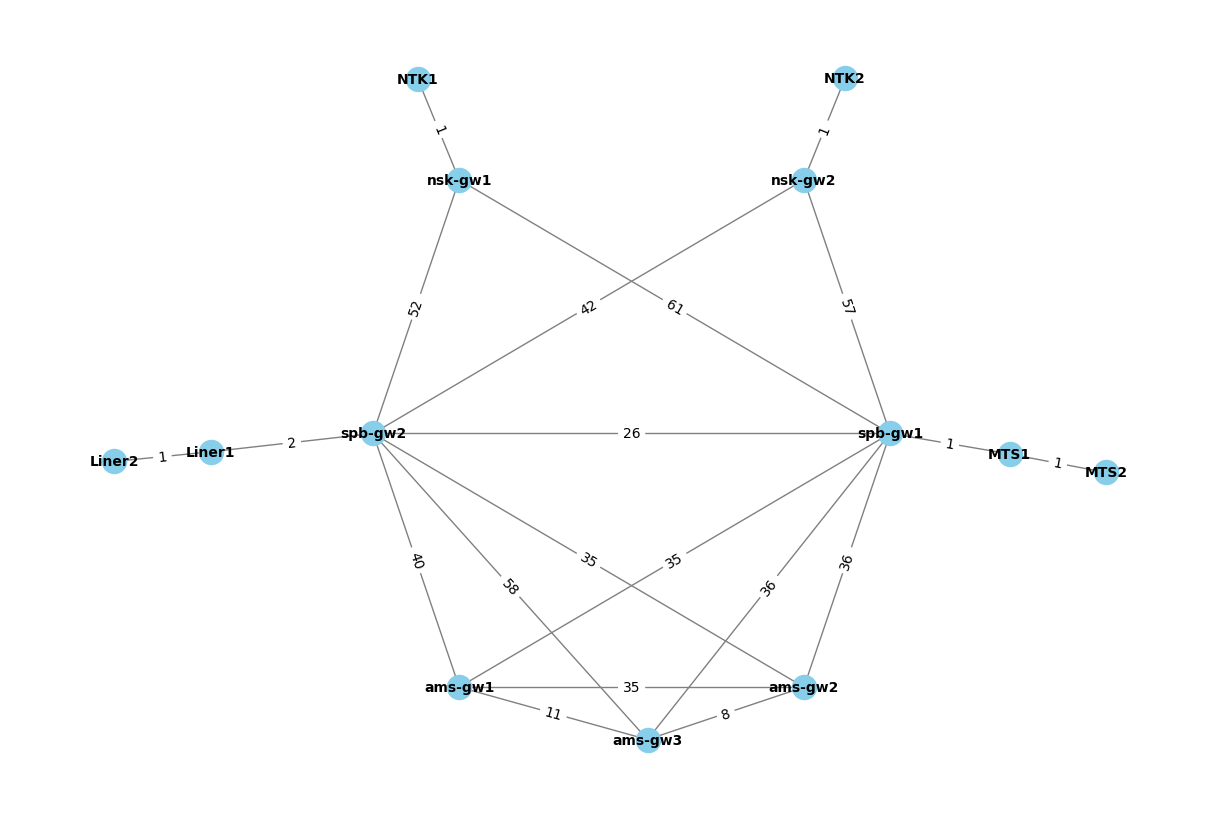

In [31]:
import networkx as nx
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# В виду того, что алгоритм раскладки использует физику притяжения 
# (чем больше вес ребра - тем короче расстояние между узлами)
# используем f(x)=1/x + a , чтобы починить отображение

for u, v, data in G1.edges(data=True):
    real_weight = data["weight"]
    if real_weight > 0:
        data["spring_strength"] = 1 / real_weight * 5
    else:
        data["spring_strength"] = 0

# а это тот момент, где я замучался отлаживать алгоритм дальше и просто часть узлов "прибил гвоздями"        
fixed_positions = {
    "nsk-gw1": [-0.1, 1.0],
    "nsk-gw2": [0.7, 1.0],
    "spb-gw2": [-0.3, 0.5],
    "spb-gw1": [0.9, 0.5],
    "ams-gw1": [-0.1, 0],
    "ams-gw2": [0.7, 0],
}

pos = nx.spring_layout(G1, 
    weight="spring_strength",
    k=(1 / len(nodes) ** 0.5),
    seed=42,
    pos=fixed_positions,
    fixed=fixed_positions.keys()
) 

nx.draw(G1, pos, 
        with_labels=True, 
        node_color="skyblue", 
        node_size=300, 
        font_size=10, 
        font_weight="bold",
        edge_color="gray")

labels = nx.get_edge_attributes(G1, "weight")
nx.draw_networkx_edge_labels(G1, pos, edge_labels=labels)

plt.show()